<h1>I. Loading library and dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, make_scorer

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r"C:\Users\PC\Downloads\insurance_claims.csv")
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


<h1>II. EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


<h2> 1. Missing value 

There are many unknown values represented by '?', and these symbols will be converted to missing values.

In [5]:
data.replace('?', np.nan, inplace=True)

Identify columns containing missing values.

In [6]:
data.isnull().sum().sort_values(ascending=False)

_c39                           1000
property_damage                 360
police_report_available         343
collision_type                  178
authorities_contacted            91
bodily_injuries                   0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
fraud_reported                    0
auto_year                         0
auto_model                        0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
witnesses                         0
months_as_customer                0
age                               0
insured_zip                       0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable           

The entire column _c39 consists of missing values and will therefore be dropped.

In [7]:
data.drop(['_c39'],axis=1,inplace=True)

The policy_number column has 1000 unique values. Since this column functions like an ID and doesn't hold much predictive value, it will be dropped.

In [8]:
data['policy_number'].nunique()

1000

In [9]:
data.drop(['policy_number'],axis=1,inplace=True)

Umbrella limit values are usually positive because they represent the coverage amount. It wouldn't make sense for the coverage limit to be negative. Therefore, any umbrella limit values less than 0 will be dropped.

In [10]:
data.drop(data[data['umbrella_limit'] < 0].index, inplace=True)

<h2>2. Outlier 

Identifying Outliers with Boxplot Visualization.

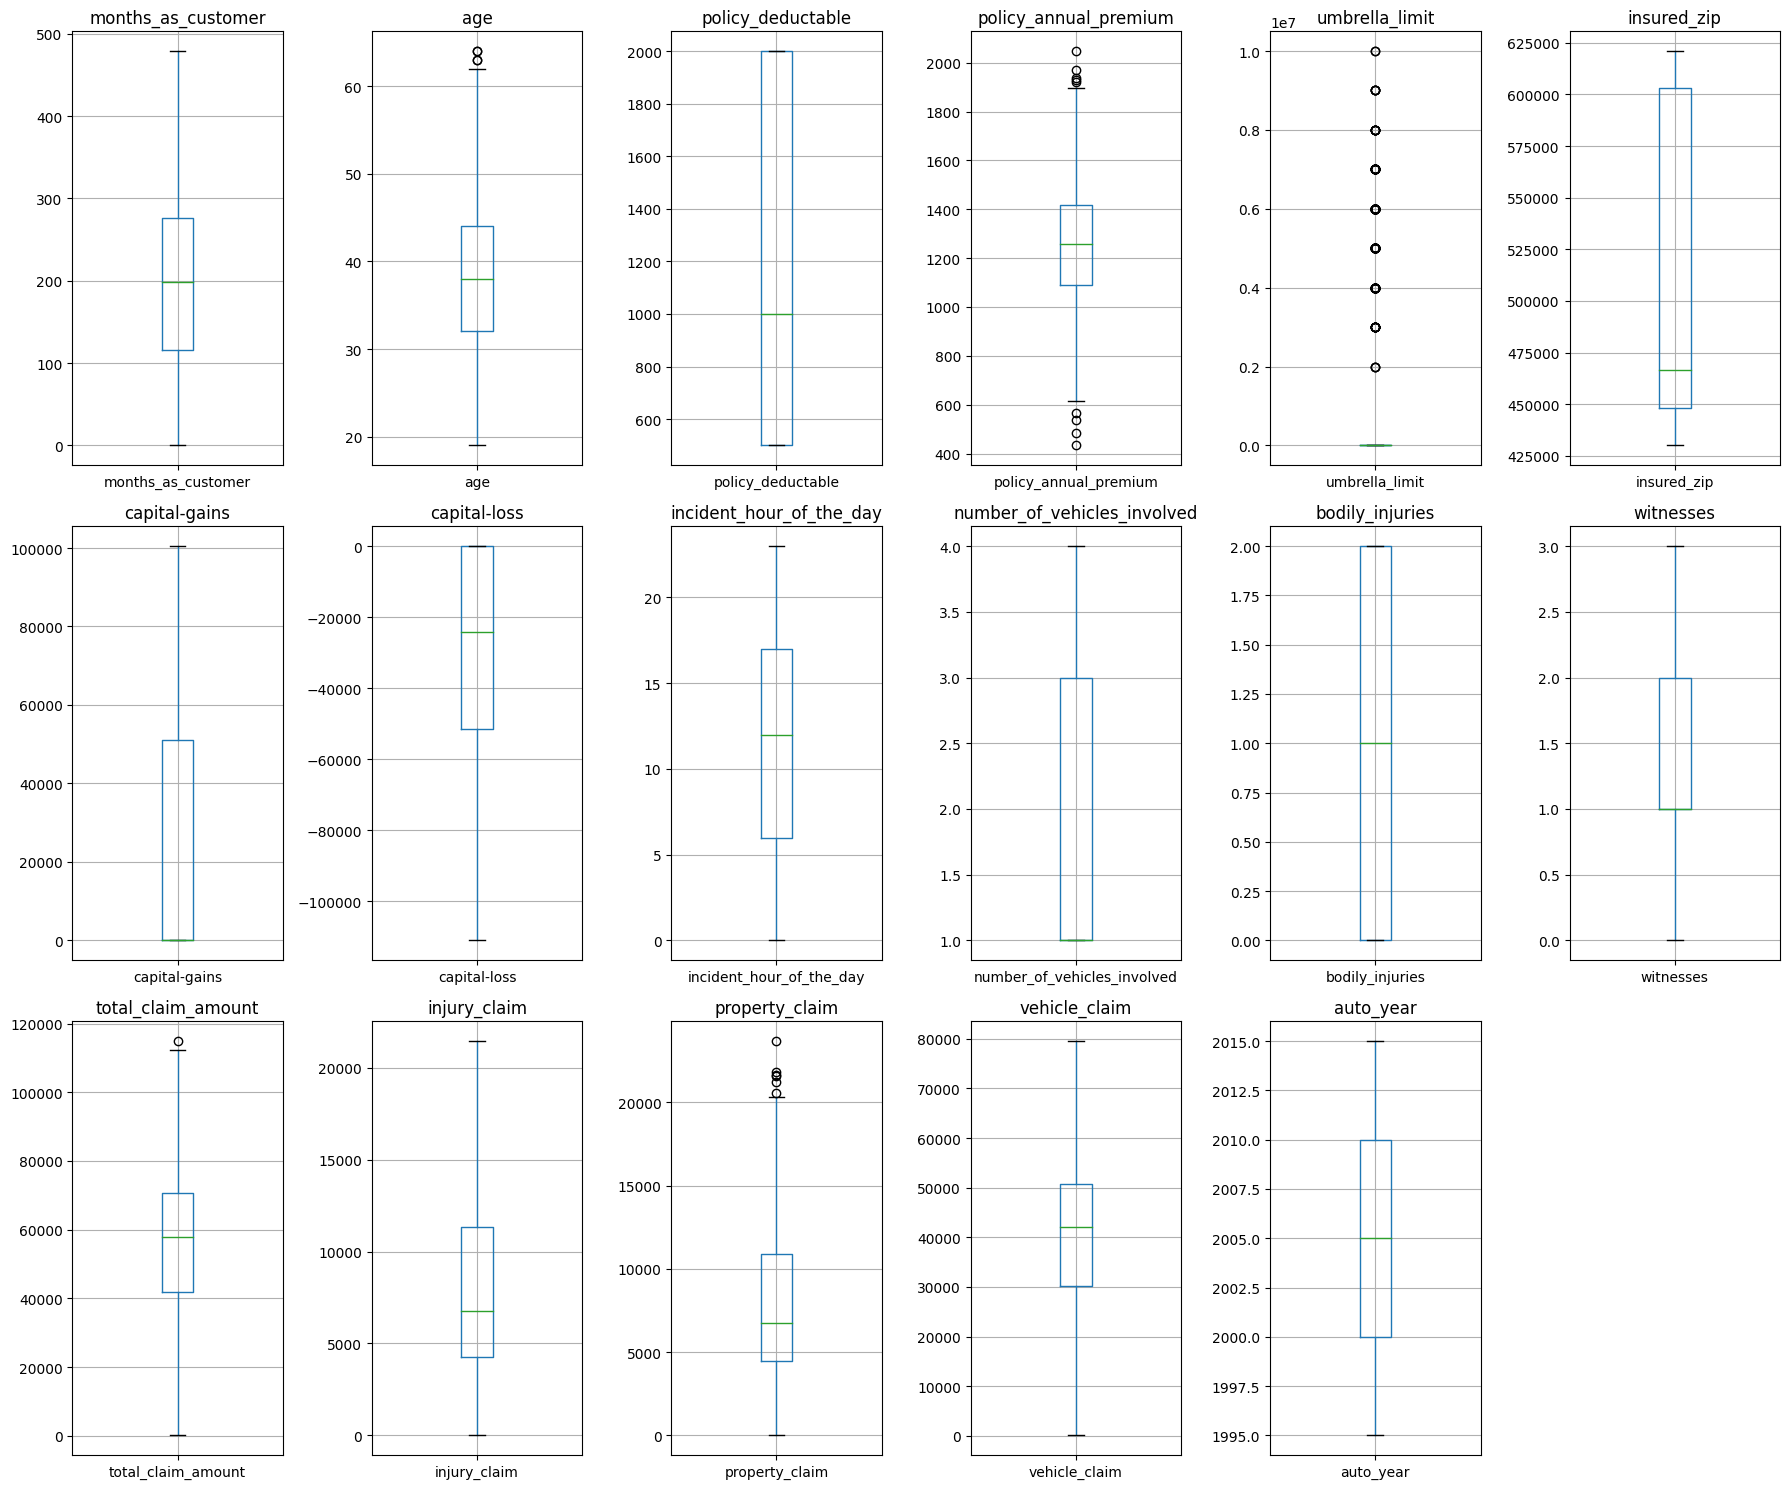

In [11]:
numerical_columns = data.select_dtypes(include=['number']).columns
num_cols = 6
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols 
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 5)) 
axs = axs.flatten()  
for i, col in enumerate(numerical_columns): 
    data.boxplot(column=col, ax=axs[i]) 
    axs[i].set_title(f'{col}') 
    axs[i].set_xlabel('') 

for j in range(i + 1, len(axs)):  
    fig.delaxes(axs[j]) 
plt.tight_layout() 
plt.show()

<h2>3. Class imbalance 

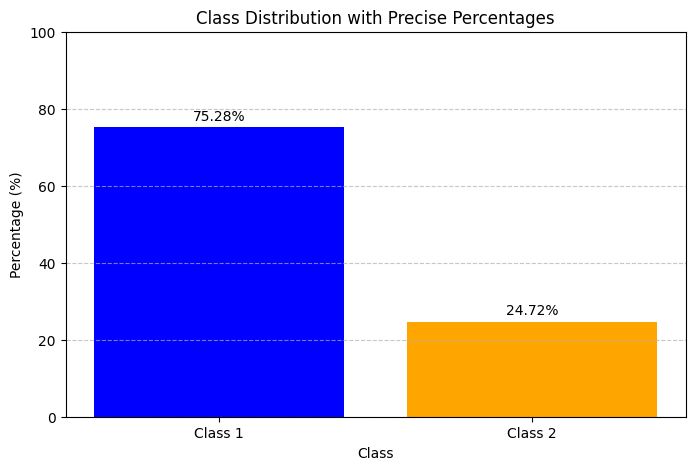

In [12]:
percent_1 = len(data[data['fraud_reported'] == 'N']) / len(data) * 100 
percent_2 = len(data[data['fraud_reported'] == 'Y']) / len(data) * 100 

precise_values = [percent_1, percent_2]

plt.figure(figsize=(8, 5))
bars = plt.bar(['Class 1', 'Class 2'], precise_values, color=['blue', 'orange'])

for bar, value in zip(bars, precise_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, 
             f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution with Precise Percentages')
plt.ylabel('Percentage (%)')
plt.xlabel('Class')
plt.ylim(0, 100) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>III. Preprocessing 

<h2>1. Transforming data

The policy_bind_date and incident_date columns will be converted to datetime format and split into separate day, month, and year columns.

In [13]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date'] = pd.to_datetime(data['incident_date'])

data['policy_bind_year'] = data['policy_bind_date'].dt.year
data['policy_bind_month'] = data['policy_bind_date'].dt.month
data['policy_bind_day'] = data['policy_bind_date'].dt.day

data['incident_year'] = data['incident_date'].dt.year
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day

columns_to_drop = ['policy_bind_date', 'incident_date']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

The policy_csl is written in the format of Bodily Injury Liability / Property Damage Liability, so it will be split into two columns: policy_csl_1, containing Bodily Injury Liability, and policy_csl_2, containing Property Damage Liability.

In [14]:
data[['policy_csl_1', 'policy_csl_2']] = data['policy_csl'].str.split('/', expand=True)
data.drop(['policy_csl'], axis=1, inplace=True)

The incident_location column will be split into two separate columns: incident_number and incident_road. 

In [15]:
data[['incident_number', 'incident_road']] = data['incident_location'].str.extract(r'(\d+)\s(.+)') 
data_number = data[['incident_number']]
data_road = data[['incident_road']]
data_split = pd.concat([data_number, data_road], ignore_index=True)

data.drop('incident_location', axis=1, inplace=True)

Finally, convert the newly created columns to integer format. 

In [16]:
data['policy_csl_1'] = data['policy_csl_1'].astype(int)
data['policy_csl_2'] = data['policy_csl_2'].astype(int)
data['incident_number'] = data['incident_number'].astype(int)

<h2>2 .Feature engineering 

Creating new features base on domain knowledge 
- High Claim Amount: Claims above $10,000 are considered high, flagged as high_claim_amount
- Multiple Claims: Total claims (injury, property, vehicle) above $15,000, flagged as multiple_claims.
- High Deductible: Deductibles above $500, flagged as high_deductible.
- Risky Auto Age: Vehicles older than 10 years, flagged as risky_auto_age.
- Customer Income Level: Net income calculated from capital gains and losses.

In [17]:
claim_threshold = 10000
multiple_claims_threshold = 15000
deductible_threshold = 500
current_year = 2024
auto_age_threshold = 10

data['high_claim_amount'] = (data['total_claim_amount'] > claim_threshold).astype(int)
data['multiple_claims'] = ((data['injury_claim'] + data['property_claim'] + data['vehicle_claim']) > multiple_claims_threshold).astype(int)
data['high_deductible'] = (data['policy_deductable'] > deductible_threshold).astype(int)
data['risky_auto_age'] = ((current_year - data['auto_year']) > auto_age_threshold).astype(int)
data['customer_income_level'] = data['capital-gains'] - data['capital-loss']

<h2>3. Imputing missing value

The cause of the missing values is not clear. Instead of removing them, they will be imputed. Since all columns with missing values are categorical, they will be imputed using the median.

In [18]:
imputer = SimpleImputer(strategy='most_frequent')
data[['property_damage', 'police_report_available', 'collision_type', 'authorities_contacted']] =imputer.fit_transform(data[['property_damage', 'police_report_available', 'collision_type', 'authorities_contacted']])
data

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,policy_csl_1,policy_csl_2,incident_number,incident_road,high_claim_amount,multiple_claims,high_deductible,risky_auto_age,customer_income_level
0,328,48,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10,17,2015,1,25,250,500,9935,4th Drive,1,1,1,1,53300
1,228,42,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6,27,2015,1,21,250,500,6608,MLK Hwy,0,0,1,1,0
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,9,6,2015,2,22,100,300,7121,Francis Lane,1,1,1,1,35100
3,256,41,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25,2015,1,10,250,500,6956,Maple Drive,1,1,1,0,111300
4,228,44,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,6,2015,2,17,500,1000,3041,3rd Ave,0,0,1,1,112000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N,1991,7,16,2015,2,22,500,1000,6045,Andromedia St,1,1,1,1,0
996,285,41,IL,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,2014,1,5,2015,1,24,100,300,3092,Texas Drive,1,1,1,0,70900
997,130,34,OH,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,2003,2,17,2015,1,23,250,500,7629,5th St,1,1,0,1,35100
998,458,62,IL,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,2011,11,18,2015,2,26,500,1000,6128,Elm Lane,1,1,1,1,0


<h2>4. Remove outliers

Since the prediction results will be evaluated based on a test file separated from the overall dataset, outliers will be removed here without worrying that the model will encounter unseen outliers.

In [19]:
data['fraud_reported'] = data['fraud_reported'].map({'Y': 1, 'N': 0})
numerical_columns = data.select_dtypes(include=['number']).columns.difference(['fraud_reported'])

def remove_outliers(data, numerical_columns):
    for col in numerical_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# data = remove_outliers(data, numerical_columns)

In [20]:
X = data.drop(columns=['fraud_reported'])
y = data['fraud_reported']

<h2>5. Encoding 

To preprocess the features of the dataset, several encoding techniques were employed to transform categorical variables into numerical formats suitable for modeling.

- One-Hot Encoding: Applied to categorical features with no inherent order, such as policy_state, insured_hobbies, insured_relationship, incident_type, authorities_contacted, collision_type, incident_state, incident_city, and incident_road. 

- Frequency Encoding: Used for categorical features with high cardinality, including auto_make, auto_model, and insured_occupation

- Ordinal Encoding: Applied to ordinal features with a natural order, such as insured_sex, property_damage, and police_report_available. Specific categories were mapped to numerical values, preserving their rank ordering.

- Custom Ordinal Encoding: Implemented for insured_education_level and incident_severity, where custom-defined hierarchical categories were mapped to corresponding numerical values.

In [21]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.frequency_dict = {}
        for column in X.columns:
            self.frequency_dict[column] = X[column].value_counts().to_dict()
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        for column in X.columns:
            X_transformed[column] = X[column].map(self.frequency_dict[column])
        return X_transformed
    
    def get_feature_names_out(self, input_features=None):
        return input_features if input_features is not None else self.frequency_dict.keys()

one_hot_columns = [
    'policy_state', 'insured_hobbies', 'insured_relationship', 
    'incident_type', 'authorities_contacted', 'collision_type',
    'incident_state', 'incident_city', 'incident_road', 
]
frequency_columns = ['auto_make', 'auto_model', 'insured_occupation']
ordinal_columns = ['insured_sex', 'property_damage', 'police_report_available']
custom_ordinal_columns = ['insured_education_level', 'incident_severity']

ordinal_categories = [
    ['FEMALE', 'MALE'], 
    ['NO', 'YES'],     
    ['NO', 'YES']        
]

custom_ordinal_categories = [
    ['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College', 'JD'], 
    ['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']       
]

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_columns),
        ('frequency', FrequencyEncoder(), frequency_columns),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_columns),
        ('custom_ordinal', OrdinalEncoder(categories=custom_ordinal_categories), custom_ordinal_columns)
    ], 
    remainder='passthrough' 
)

X_encoded = preprocessor.fit_transform(X)

onehot_columns = preprocessor.transformers_[0][1].get_feature_names_out(one_hot_columns)
frequency_columns = frequency_columns  
ordinal_columns = ordinal_columns  
custom_ordinal_columns = custom_ordinal_columns  

columns = list(onehot_columns) + frequency_columns + ordinal_columns + custom_ordinal_columns

numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()

columns = columns + numerical_columns

assert len(columns) == X_encoded.shape[1], "Mismatch between number of columns and transformed data shape"

X_final = pd.DataFrame(X_encoded, columns=columns, index=X.index)

X = X_final

In [22]:
X

,policy_state_IL,policy_state_IN,policy_state_OH,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,incident_road_1st Ave,incident_road_1st Drive,incident_road_1st Hwy,incident_road_1st Lane,incident_road_1st Ridge,incident_road_1st St,incident_road_2nd Ave,incident_road_2nd Drive,incident_road_2nd Hwy,incident_road_2nd Lane,incident_road_2nd Ridge,incident_road_2nd St,incident_road_3rd Ave,incident_road_3rd Drive,incident_road_3rd Hwy,incident_road_3rd Lane,incident_road_3rd Ridge,incident_road_3rd St,incident_road_4th Ave,incident_road_4th Drive,incident_road_4th Hwy,incident_road_4th Lane,incident_road_4th Ridge,incident_road_4th St,incident_road_5th Ave,incident_road_5th Drive,incident_road_5th Hwy,incident_road_5th Lane,incident_road_5th Ridge,incident_road_5th St,incident_road_Andromedia Ave,incident_road_Andromedia Drive,incident_road_Andromedia Hwy,incident_road_Andromedia Lane,incident_road_Andromedia Ridge,incident_road_Andromedia St,incident_road_Apache Ave,incident_road_Apache Drive,incident_road_Apache Hwy,incident_road_Apache Lane,incident_road_Apache Ridge,incident_road_Apache St,incident_road_Best Ave,incident_road_Best Drive,incident_road_Best Hwy,incident_road_Best Lane,incident_road_Best Ridge,incident_road_Best St,incident_road_Britain Ave,incident_road_Britain Drive,incident_road_Britain Hwy,incident_road_Britain Lane,incident_road_Britain Ridge,incident_road_Britain St,incident_road_Cherokee Ave,incident_road_Cherokee Drive,incident_road_Cherokee Hwy,incident_road_Cherokee Lane,incident_road_Cherokee Ridge,incident_road_Cherokee St,incident_road_Elm Ave,incident_road_Elm Drive,incident_road_Elm Hwy,incident_road_Elm Lane,incident_road_Elm Ridge,incident_road_Elm St,incident_road_Embaracadero Ave,incident_road_Embaracadero Drive,incident_road_Embaracadero Hwy,incident_road_Embaracadero Lane,incident_road_Embaracadero Ridge,incident_road_Embaracadero St,incident_road_Flute Ave,incident_road_Flute Drive,incident_road_Flute Hwy,incident_road_Flute Lane,incident_road_Flute Ridge,incident_road_Flute St,incident_road_Francis Ave,incident_road_Francis Drive,incident_road_Francis Hwy,incident_road_Francis Lane,incident_road_Francis Ridge,incident_road_Francis St,incident_road_Lincoln Ave,incident_road_Lincoln Drive,incident_road_Lincoln Hwy,incident_road_Lincoln Lane,incident_road_Lincoln Ridge,incident_road_Lincoln St,incident_road_MLK Ave,incident_road_MLK Drive,incident_road_MLK Hwy,incident_road_MLK Lane,incident_road_MLK Ridge,incident_road_MLK St,incident_road_Maple Ave,incident_road_Maple Drive,incident_road_Maple Hwy,incident_road_Maple Lane,incident_road_Maple Ridge,incident_road_Maple St,incident_road_Oak Ave,incident_road_Oak Drive,incident_road_Oak Hwy,i

<h2>6. Train, test split 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
cv = StratifiedKFold(5, shuffle=True, random_state=42)

<h1>IV. Model 

<h2>1. Decision tree 

In [25]:
model = DecisionTreeClassifier(random_state=42)

scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'accuracy': 'accuracy'
}

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1 
)

f1_mean = cv_results['test_f1_weighted'].mean()
recall_mean = cv_results['test_recall_weighted'].mean()
precision_mean = cv_results['test_precision_weighted'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (Weighted, CV Mean): {f1_mean:.4f}")
print(f"Recall (Weighted, CV Mean): {recall_mean:.4f}")
print(f"Precision (Weighted, CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (Weighted, CV Mean): 0.8043
Recall (Weighted, CV Mean): 0.7998
Precision (Weighted, CV Mean): 0.8135
Accuracy (CV Mean): 0.7998


In [26]:
model = DecisionTreeClassifier(random_state=42)
scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'accuracy': 'accuracy'
}

pipeline = Pipeline([
    ('smote', SMOTETomek(random_state=42)), 
    ('classifier', model)              
])

cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1
)

f1_mean = cv_results['test_f1_weighted'].mean()
recall_mean = cv_results['test_recall_weighted'].mean()
precision_mean = cv_results['test_precision_weighted'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (Weighted, CV Mean): {f1_mean:.4f}")
print(f"Recall (Weighted, CV Mean): {recall_mean:.4f}")
print(f"Precision (Weighted, CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (Weighted, CV Mean): 0.8209
Recall (Weighted, CV Mean): 0.8210
Precision (Weighted, CV Mean): 0.8262
Accuracy (CV Mean): 0.8210


In [27]:
model = DecisionTreeClassifier(random_state=42)

scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'accuracy': 'accuracy'
}

max_features = X_train.shape[1]

results = []

for n_features in range(1, max_features + 1):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    X_rfe_train = rfe.fit_transform(X_train, y_train)

    pipeline = Pipeline([
        ('smote_tomek', SMOTETomek(random_state=42)),  
        ('classifier', model) 
    ])

    pipeline.fit(X_rfe_train, y_train)


    cv_results = cross_validate(
        estimator=pipeline,
        X=X_rfe_train,
        y=y_train,
        scoring=scoring,
        cv=cv,  
        return_train_score=False,
        n_jobs=-1
    )

    X_rfe_test = rfe.transform(X_test)
    y_pred_test = pipeline.predict(X_rfe_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    result = {
        'n_features': n_features,
        'f1_mean': cv_results['test_f1_weighted'].mean(),
        'recall_mean': cv_results['test_recall_weighted'].mean(),
        'precision_mean': cv_results['test_precision_weighted'].mean(),
        'accuracy_mean': cv_results['test_accuracy'].mean(),
        'test_f1': test_f1
    }
    results.append(result)

    print(f"Number of Features: {n_features} | "
          f"F1: {result['f1_mean']:.4f} | "
          f"Recall: {result['recall_mean']:.4f} | "
          f"Precision: {result['precision_mean']:.4f} | "
          f"Accuracy: {result['accuracy_mean']:.4f} | "
          f"Test F1: {result['test_f1']:.4f}")

results_df = pd.DataFrame(results)

best_row = results_df.loc[results_df['test_f1'].idxmax()]
best_n_features = int(best_row['n_features'])

print("\nBest Number of Features:")
print(f"Number of Features: {best_n_features}")
print(f"F1 Score (CV Mean): {best_row['test_f1']:.4f}")
print(f"Recall: {best_row['recall_mean']:.4f}")
print(f"Precision: {best_row['precision_mean']:.4f}")
print(f"Accuracy: {best_row['accuracy_mean']:.4f}")
print(f"Test F1: {best_row['test_f1']:.4f}")

Number of Features: 1 | F1: 0.5600 | Recall: 0.5307 | Precision: 0.6183 | Accuracy: 0.5307 | Test F1: 0.5475
Number of Features: 2 | F1: 0.6131 | Recall: 0.5958 | Precision: 0.6383 | Accuracy: 0.5958 | Test F1: 0.6150
Number of Features: 3 | F1: 0.7440 | Recall: 0.7409 | Precision: 0.7483 | Accuracy: 0.7409 | Test F1: 0.7476
Number of Features: 4 | F1: 0.7077 | Recall: 0.7034 | Precision: 0.7140 | Accuracy: 0.7034 | Test F1: 0.7575
Number of Features: 5 | F1: 0.7675 | Recall: 0.7673 | Precision: 0.7688 | Accuracy: 0.7673 | Test F1: 0.7984
Number of Features: 6 | F1: 0.7902 | Recall: 0.7885 | Precision: 0.7931 | Accuracy: 0.7885 | Test F1: 0.7781
Number of Features: 7 | F1: 0.8155 | Recall: 0.8135 | Precision: 0.8202 | Accuracy: 0.8135 | Test F1: 0.8201
Number of Features: 8 | F1: 0.7958 | Recall: 0.7948 | Precision: 0.7983 | Accuracy: 0.7948 | Test F1: 0.7705
Number of Features: 9 | F1: 0.7956 | Recall: 0.7935 | Precision: 0.8014 | Accuracy: 0.7935 | Test F1: 0.7599
Number of Features:

In [28]:
smote_tomek = SMOTETomek(random_state=42)

base_model = DecisionTreeClassifier(random_state=42)

rfe = RFE(estimator=base_model, n_features_to_select=24)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_rfe, y_train)

scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'accuracy': 'accuracy'
}

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv,  
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

cv_results = cross_validate(
    estimator=best_model,
    X=X_train_resampled,
    y=y_train_resampled,
    scoring=scoring,
    cv=3,  
    return_train_score=False,
    n_jobs=-1
)

f1_mean = cv_results['test_f1_weighted'].mean()
recall_mean = cv_results['test_recall_weighted'].mean()
precision_mean = cv_results['test_precision_weighted'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Best Hyperparameters:", grid_search.best_params_)
print("\nCross-Validated Mean Scores:")
print(f"F1 Score (Weighted, CV Mean): {f1_mean:.4f}")
print(f"Recall (Weighted, CV Mean): {recall_mean:.4f}")
print(f"Precision (Weighted, CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

y_pred_test = best_model.predict(X_test_rfe)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')
accuracy_test = best_model.score(X_test_rfe, y_test)

print("\nTest Set Scores with Tuned Model:")
print(f"F1 Score (Weighted): {f1_test:.4f}")
print(f"Recall (Weighted): {recall_test:.4f}")
print(f"Precision (Weighted): {precision_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Cross-Validated Mean Scores:
F1 Score (Weighted, CV Mean): 0.8753
Recall (Weighted, CV Mean): 0.8757
Precision (Weighted, CV Mean): 0.8800
Accuracy (CV Mean): 0.8757

Test Set Scores with Tuned Model:
F1 Score (Weighted): 0.8482
Recall (Weighted): 0.8400
Precision (Weighted): 0.8737
Accuracy: 0.8400


<h2>2. Random forest 

In [182]:
model = RandomForestClassifier(random_state=42)

scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'accuracy': 'accuracy'
}

cv_results = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1 
)

f1_mean = cv_results['test_f1_weighted'].mean()
recall_mean = cv_results['test_recall_weighted'].mean()
precision_mean = cv_results['test_precision_weighted'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (Weighted, CV Mean): {f1_mean:.4f}")
print(f"Recall (Weighted, CV Mean): {recall_mean:.4f}")
print(f"Precision (Weighted, CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (Weighted, CV Mean): 0.7236
Recall (Weighted, CV Mean): 0.7760
Precision (Weighted, CV Mean): 0.7645
Accuracy (CV Mean): 0.7760


In [193]:
model = RandomForestClassifier(random_state=42)
scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'accuracy': 'accuracy'
}


pipeline = Pipeline([
    ('smote', SMOTETomek(random_state=42)),  
    ('classifier', model)             
])

cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1
)

f1_mean = cv_results['test_f1_weighted'].mean()
recall_mean = cv_results['test_recall_weighted'].mean()
precision_mean = cv_results['test_precision_weighted'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (Weighted, CV Mean): {f1_mean:.4f}")
print(f"Recall (Weighted, CV Mean): {recall_mean:.4f}")
print(f"Precision (Weighted, CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (Weighted, CV Mean): 0.7598
Recall (Weighted, CV Mean): 0.7947
Precision (Weighted, CV Mean): 0.7821
Accuracy (CV Mean): 0.7947


In [194]:
model = RandomForestClassifier(random_state=42)

scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'accuracy': 'accuracy'
}

max_features = X_train.shape[1]

results = []

for n_features in range(1, max_features + 1):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    X_rfe_train = rfe.fit_transform(X_train, y_train)

    pipeline = Pipeline([
        ('smote_tomek', SMOTETomek(random_state=42)),  
        ('classifier', model)  
    ])

    pipeline.fit(X_rfe_train, y_train)

    cv_results = cross_validate(
        estimator=pipeline,
        X=X_rfe_train,
        y=y_train,
        scoring=scoring,
        cv=cv,  
        return_train_score=False,
        n_jobs=-1
    )

    X_rfe_test = rfe.transform(X_test)
    y_pred_test = pipeline.predict(X_rfe_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    result = {
        'n_features': n_features,
        'f1_mean': cv_results['test_f1_weighted'].mean(),
        'recall_mean': cv_results['test_recall_weighted'].mean(),
        'precision_mean': cv_results['test_precision_weighted'].mean(),
        'accuracy_mean': cv_results['test_accuracy'].mean(),
        'test_f1': test_f1
    }
    results.append(result)

    print(f"Number of Features: {n_features} | "
          f"F1: {result['f1_mean']:.4f} | "
          f"Recall: {result['recall_mean']:.4f} | "
          f"Precision: {result['precision_mean']:.4f} | "
          f"Accuracy: {result['accuracy_mean']:.4f} | "
          f"Test F1: {result['test_f1']:.4f}")

results_df = pd.DataFrame(results)

best_row = results_df.loc[results_df['f1_mean'].idxmax()]
best_n_features = int(best_row['n_features'])

print("\nBest Number of Features:")
print(f"Number of Features: {best_n_features}")
print(f"F1 Score (CV Mean): {best_row['f1_mean']:.4f}")
print(f"Recall: {best_row['recall_mean']:.4f}")
print(f"Precision: {best_row['precision_mean']:.4f}")
print(f"Accuracy: {best_row['accuracy_mean']:.4f}")
print(f"Test F1: {best_row['test_f1']:.4f}")

Number of Features: 1 | F1: 0.5781 | Recall: 0.5507 | Precision: 0.6317 | Accuracy: 0.5507 | Test F1: 0.5779
Number of Features: 2 | F1: 0.5947 | Recall: 0.5743 | Precision: 0.6293 | Accuracy: 0.5743 | Test F1: 0.6081
Number of Features: 3 | F1: 0.7803 | Recall: 0.7810 | Precision: 0.7836 | Accuracy: 0.7810 | Test F1: 0.7858
Number of Features: 4 | F1: 0.7998 | Recall: 0.8035 | Precision: 0.8002 | Accuracy: 0.8035 | Test F1: 0.7829
Number of Features: 5 | F1: 0.7944 | Recall: 0.7948 | Precision: 0.7975 | Accuracy: 0.7948 | Test F1: 0.7843
Number of Features: 6 | F1: 0.8009 | Recall: 0.8023 | Precision: 0.8028 | Accuracy: 0.8023 | Test F1: 0.7885
Number of Features: 7 | F1: 0.8029 | Recall: 0.8048 | Precision: 0.8043 | Accuracy: 0.8048 | Test F1: 0.7829
Number of Features: 8 | F1: 0.8449 | Recall: 0.8436 | Precision: 0.8480 | Accuracy: 0.8436 | Test F1: 0.8201
Number of Features: 9 | F1: 0.8362 | Recall: 0.8348 | Precision: 0.8394 | Accuracy: 0.8348 | Test F1: 0.8235
Number of Features:

In [197]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)

scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'accuracy': 'accuracy'
}

rfe = RFE(estimator=model, n_features_to_select=36)
X_train_rfe = rfe.fit_transform(X_train, y_train)

X_test_rfe = rfe.transform(X_test)

pipeline = Pipeline([
    ('classification', model)
])

param_grid = {
    'classification__max_depth': [10, 20, 30, 40],
    'classification__min_samples_split': [2, 5, 10, 20],
    'classification__min_samples_leaf': [1, 2, 4, 8],
    'classification__max_features': ['sqrt', 'log2', None],
    'classification__n_estimators': [100, 200, 300], 
    'classification__bootstrap': [True, False] 
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    cv=cv,  
    verbose=1,
    n_jobs=-1,  
    refit='f1_weighted'  
)

grid_search.fit(X_train_rfe, y_train)

best_params = grid_search.best_params_
cv_results = grid_search.cv_results_

mean_f1 = cv_results['mean_test_f1_weighted'].max()
mean_recall = cv_results['mean_test_recall_weighted'].max()
mean_precision = cv_results['mean_test_precision_weighted'].max()
mean_accuracy = cv_results['mean_test_accuracy'].max()

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_rfe) 

f1_test = f1_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
precision_test = precision_score(y_test, y_pred, average='weighted')
accuracy_test = accuracy_score(y_test, y_pred)

print(f"\nBest Hyperparameters: {best_params}\n")

print("Cross-Validated Mean Scores:")
print(f"F1 Score (Weighted, CV Mean): {mean_f1:.4f}")
print(f"Recall (Weighted, CV Mean): {mean_recall:.4f}")
print(f"Precision (Weighted, CV Mean): {mean_precision:.4f}")
print(f"Accuracy (CV Mean): {mean_accuracy:.4f}\n")

print("Test Set Scores with Tuned Model:")
print(f"F1 Score (Weighted): {f1_test:.4f}")
print(f"Recall (Weighted): {recall_test:.4f}")
print(f"Precision (Weighted): {precision_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits

Best Hyperparameters: {'classification__bootstrap': True, 'classification__max_depth': 10, 'classification__max_features': None, 'classification__min_samples_leaf': 8, 'classification__min_samples_split': 2, 'classification__n_estimators': 200}

Cross-Validated Mean Scores:
F1 Score (Weighted, CV Mean): 0.8608
Recall (Weighted, CV Mean): 0.8586
Precision (Weighted, CV Mean): 0.8706
Accuracy (CV Mean): 0.8586

Test Set Scores with Tuned Model:
F1 Score (Weighted): 0.8201
Recall (Weighted): 0.8150
Precision (Weighted): 0.8288
Accuracy: 0.8150


<h2>3. Stacking model 

Stacking model is neither pure Decision Tree nor Random Forest model. However, I still want to try to implement this.

In [331]:
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

meta_model = DecisionTreeClassifier(max_depth=3, random_state=42)

stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=True  
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('stacking', stacking_clf)    
])

scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'accuracy': 'accuracy'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=False,
    n_jobs=-1
)

f1_mean = cv_results['test_f1_weighted'].mean()
recall_mean = cv_results['test_recall_weighted'].mean()
precision_mean = cv_results['test_precision_weighted'].mean()
accuracy_mean = cv_results['test_accuracy'].mean()

print("Cross-Validated Mean Scores:")
print(f"F1 Score (Weighted, CV Mean): {f1_mean:.4f}")
print(f"Recall (Weighted, CV Mean): {recall_mean:.4f}")
print(f"Precision (Weighted, CV Mean): {precision_mean:.4f}")
print(f"Accuracy (CV Mean): {accuracy_mean:.4f}")

Cross-Validated Mean Scores:
F1 Score (Weighted, CV Mean): 0.8369
Recall (Weighted, CV Mean): 0.8373
Precision (Weighted, CV Mean): 0.8444
Accuracy (CV Mean): 0.8373


<h1>V. Visualizing tree</h1>

Among the three baseline models tested, the Decision Tree model achieved the highest performance with the best F1 score in both training and testing. Therefore, it will be selected to visualize and find the five most important features.

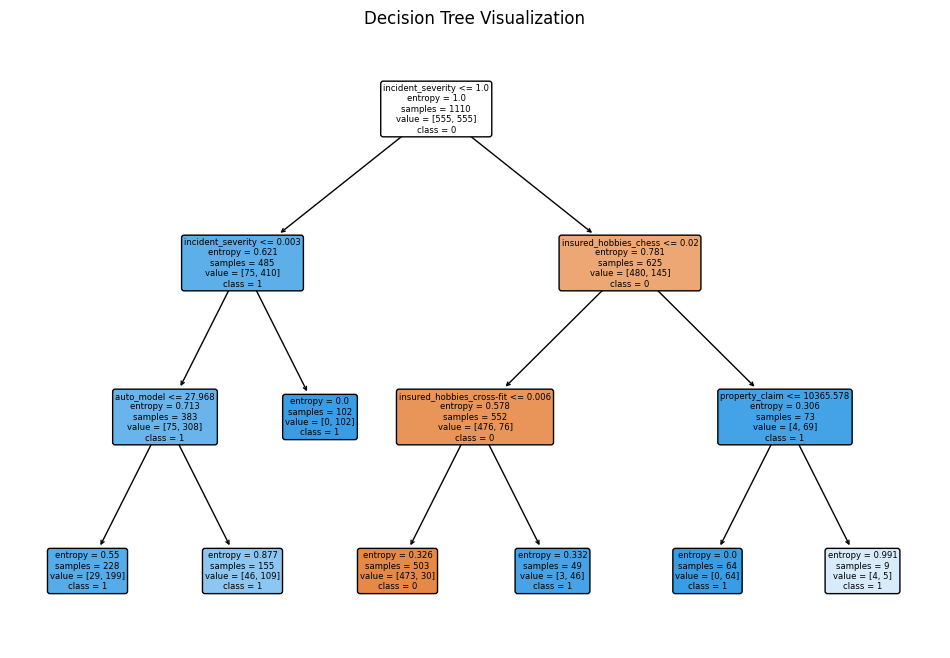

In [33]:
selected_features_mask = rfe.support_  
original_feature_names = X_train.columns  
selected_feature_names = original_feature_names[selected_features_mask]

plt.figure(figsize=(12, 8))
plot_tree(
    best_model,
    feature_names=X_train_rfe.columns if hasattr(X_train_rfe, 'columns') else None,
    class_names=[str(cls) for cls in best_model.classes_],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

Athought the classification performance of Decision Tree model in this problem is not too impressive, the structure of the tree is quite simple.

In [32]:
selected_features_mask = rfe.support_

original_feature_names = X_train.columns  
selected_feature_names = original_feature_names[selected_features_mask]

X_train_rfe = pd.DataFrame(X_train_rfe, columns=selected_feature_names)
X_test_rfe = pd.DataFrame(X_test_rfe, columns=selected_feature_names)

importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train_rfe.columns,
    'Importance': importances
})

top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

print("Top 5 Features by Importance:")
print(top_features)

Top 5 Features by Importance:
                      Feature  Importance
8           incident_severity    0.528139
0       insured_hobbies_chess    0.222787
1   insured_hobbies_cross-fit    0.210552
18             property_claim    0.020393
5                  auto_model    0.018128


The five most important feature are incident_severity, insured_hobbies_chess, insured_hobbies_cross, property_claim, auto_model.